In [29]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT
import math
import numpy as np
import sys

In [11]:
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-reco/tests/python_tools')
from NLLtreeoutReader import Reader, ROOT_tools, Reader_production
tool = ROOT_tools()

In [4]:
tree = upr.open("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.to.1000.drift-reco.analysed.root")['tReco_extended']

In [6]:
tree.keys()

['edep_file_input',
 'digit_file_input',
 'edep_event_index',
 'pt_true',
 'pt_reco',
 'p_true',
 'p_reco',
 'ptot_true',
 'ptot_reco',
 'true_helix_dip_',
 'reco_helix_dip_']

In [14]:
df = tree.arrays(['edep_file_input',
 'digit_file_input',
 'edep_event_index',
 'pt_true',
 'pt_reco',
 'p_true',
 'p_reco',
 'ptot_true',
 'ptot_reco',
 'true_helix_dip_',
 'reco_helix_dip_'], library = 'pd')

df = df.set_index(['edep_file_input','edep_event_index'])

df

digit_file_input  \
edep_file_input                                    edep_event_index                                                      
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 46                /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   73                /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   114               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   128               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   134               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                                                                ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 432               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   461               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   632               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   767               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   984               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                                                                         pt_true  \
edep_file_input                                    edep_event_index                
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 46                1191.317438   
                                                   73                3255.871390   
                                                   114               1268.757772   
                                                   128               1630.233523   
                                                   134                290.987857   
...                                                                          ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 432                 99.869596   
                                                   461               1082.765882   
                                                   632               1716.625407   
                                                   767               4377.510306   
                                                   984               2565.455720   

                                                                         pt_reco  \
edep_file_input                                    edep_event_index                
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 46                  23.987645   
                                                   73                3279.653198   
                                                   114               1279.679933   
                                                   128                 38.010445   
                                                   134                 17.431890   
...                                                                          ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 432                108.807331   
                                                   461                  8.134709   
                                                   632               1715.574374   
                                                   767               1692.796621   
                                                   984                522.938396   

                                                                        p_truefX  \
edep_file_input                                    edep_event_index                
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 46                 548.862513   
                                                   73                 -99.473

In [31]:
df['ptot_residual'] = (1/df['ptot_true'] - 1/df['ptot_reco'])/(1/df['ptot_reco'])
df['pt_residual'] = (1/df['pt_true'] - 1/df['pt_reco'])/(1/df['pt_reco'])

In [28]:
df['ptot_residual'].dropna().values

array([ 3.63946530e-03,  4.24658107e-03, -8.98271000e-01, ...,
        5.63705226e-04, -4.84957761e-04, -5.56973481e-01])

 FCN=7595.29 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=3.5256e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.24900e+03   1.55761e+01   4.74521e-01   9.84334e-06
   2  Mean        -8.05267e-03   5.43572e-05   2.30563e-06  -8.11540e+00
   3  Sigma        2.54777e-02   5.28929e-05   1.99486e-05  -8.59877e-01


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


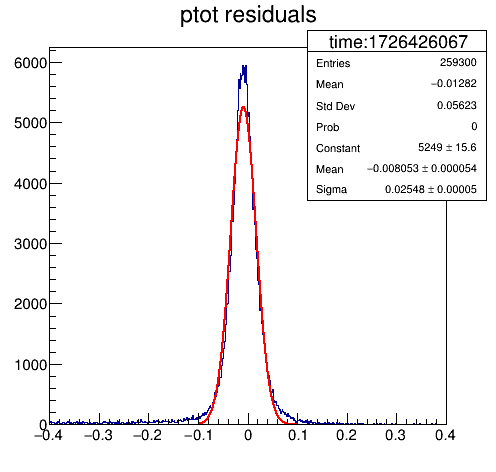

In [30]:
hist_ptot = tool.FillTH1D(iterable = df['ptot_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "ptot residuals", 
                          nbins = int(np.sqrt(len(df))),
                          #  nbins = 30,
                          x_min = -0.4, 
                          x_max = 0.4)

hist_ptot, mean, sigma = tool.FitTH1D_w_gauss(hist = hist_ptot, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

c = ROOT.TCanvas("canvas_name", "Canvas", 500, 500)
ROOT.gStyle.SetOptFit(1011)
hist_ptot.Draw()
c.Draw()

In [32]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists = [], []

# df_cut = df[(df.TMinuitFinalStatus==1)&(df.nof_digits>10)]
df_cut = df
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut.pt_true - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['pt_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)

250.0
energy range [0.0,500.0] : resolution 0.07435102383564197
750.0
energy range [500.0,1000.0] : resolution 0.05267494169538394
1250.0
energy range [1000.0,1500.0] : resolution 0.047175010320260675
1750.0
energy range [1500.0,2000.0] : resolution 0.04414996048362143
2250.0
energy range [2000.0,2500.0] : resolution 0.044848790243562316
2750.0
energy range [2500.0,3000.0] : resolution 0.04331356557791946
4000.0
energy range [3000.0,5000.0] : resolution 0.0430940728764321
6500.0
energy range [5000.0,8000.0] : resolution 0.042358224607246656
 FCN=140.731 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=8.27594e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.95724e+02   7.67571e+00   2.96131e-02   1.65943e-04
   2  Mean        -8.26660e-02   4.03835e-03   6.39780e-06   8.46611e-01
   3  

Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426223 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426223 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426223 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426223 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426223 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426223 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426223 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


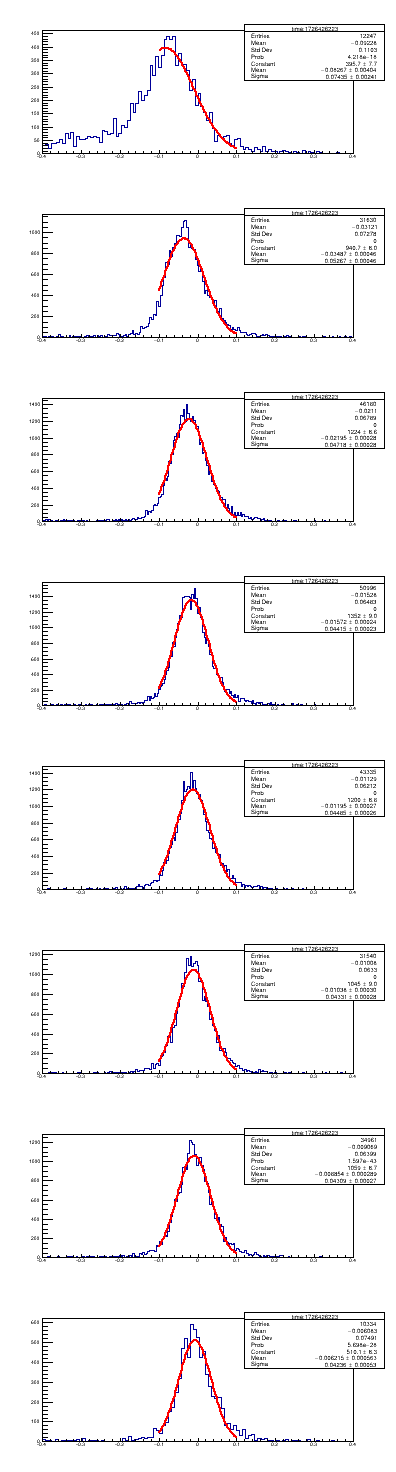

In [33]:
c = ROOT.TCanvas("canvas_name", "Canvas", 400, 1500)
ROOT.gStyle.SetOptFit(1011)
c.Divide(1,len(hists))
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist.Draw()
c.Draw()

No handles with labels found to put in legend.


Text(0.5, 0.98, '$\\mu$ momentum (transverse to B) resolution')

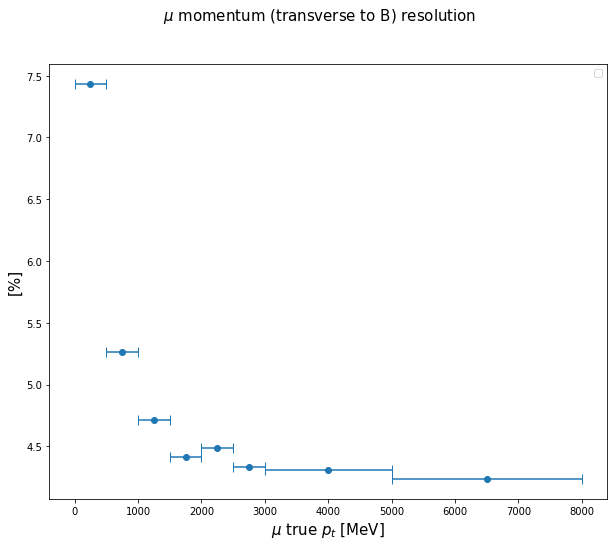

In [34]:
fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 ,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true $p_t$ [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
# plt.xticks(np.arange(0,6,0.5))
# plt.yticks(np.arange(0.1,2,0.1))
plt.legend()
plt.suptitle(r"$\mu$ momentum (transverse to B) resolution", fontsize=15)

In [35]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists = [], []

# df_cut = df[(df.TMinuitFinalStatus==1)&(df.nof_digits>10)]
df_cut = df
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut.pt_true - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['ptot_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)

250.0
energy range [0.0,500.0] : resolution 0.0476203025172346
750.0
energy range [500.0,1000.0] : resolution 0.027534061759850792
1250.0
energy range [1000.0,1500.0] : resolution 0.024992460649361937
1750.0
energy range [1500.0,2000.0] : resolution 0.023301885504657727
2250.0
energy range [2000.0,2500.0] : resolution 0.023615561939750642
2750.0
energy range [2500.0,3000.0] : resolution 0.023199020639853
4000.0
energy range [3000.0,5000.0] : resolution 0.023325984224624414
6500.0
energy range [5000.0,8000.0] : resolution 0.023794797331087403
 FCN=270.014 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=7.07879e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.87481e+02   8.08299e+00   4.53005e-02   5.17656e-06
   2  Mean        -2.85608e-02   6.52489e-04   5.03845e-06  -1.15535e-02
   3 

Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426352 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426352 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426352 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426352 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426352 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426352 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726426352 (Potential memory leak).


No handles with labels found to put in legend.


Text(0.5, 1.0, '$\\mu$ momentum resolution')

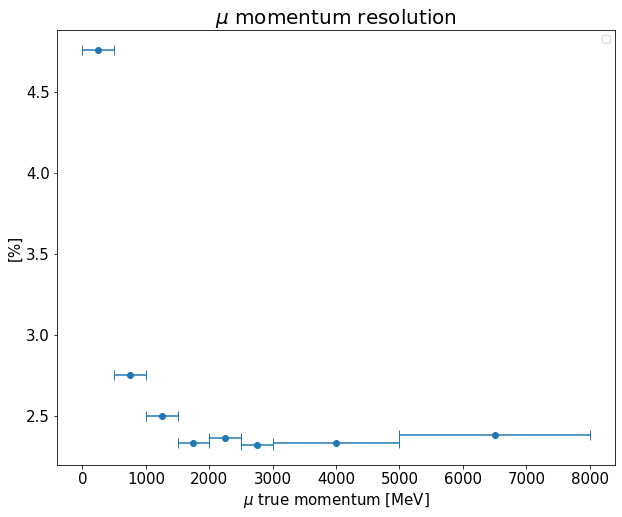

In [37]:
fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 ,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true momentum [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.title(r"$\mu$ momentum resolution", fontsize=20)

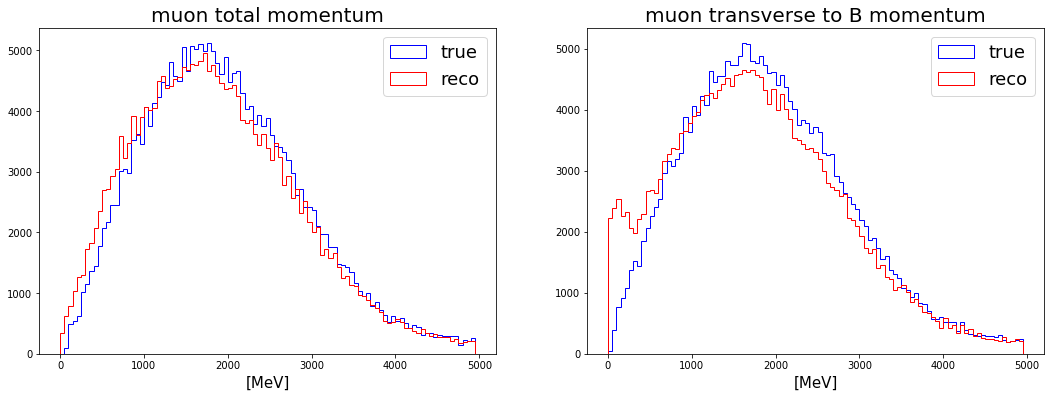

In [50]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].hist(df.dropna()['ptot_true'], bins=np.arange(0, 5000, 50), histtype='step', label='true', color='blue')
ax[0].hist(df.dropna()['ptot_reco'], bins=np.arange(0, 5000, 50), histtype='step', label='reco', color='red')

ax[1].hist(df.dropna()['pt_true'], bins=np.arange(0, 5000, 50), histtype='step', label='true', color='blue')
ax[1].hist(df.dropna()['pt_reco'], bins=np.arange(0, 5000, 50), histtype='step', label='reco', color='red')

ax[0].set_title("muon total momentum", fontsize=20)
ax[0].set_xlabel("[MeV]",fontsize=15)
ax[0].legend(fontsize=18)

ax[1].set_title("muon transverse to B momentum", fontsize=20)
ax[1].set_xlabel("[MeV]",fontsize=15)
ax[1].legend(fontsize=18)

Text(0.5, 0, 'pz_true - pz_reco [MeV]')

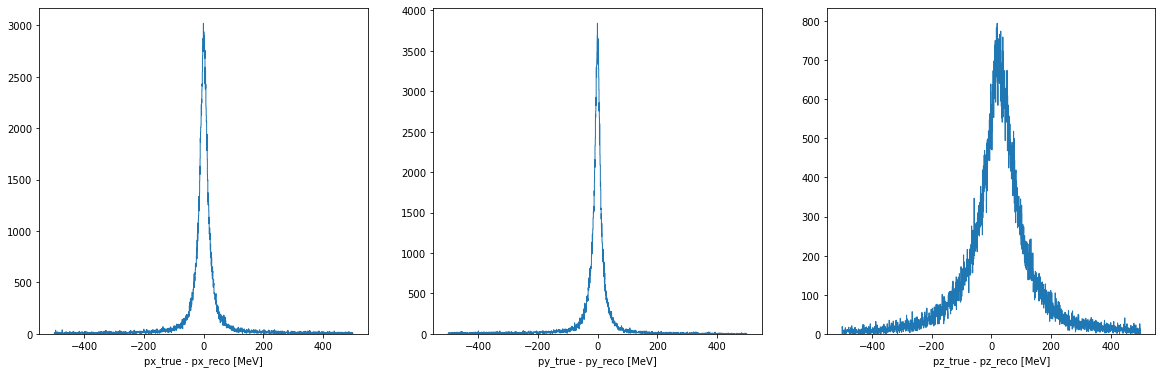

In [63]:
fig,ax = plt.subplots(1,3, figsize=(20,6))

ax[0].hist(x=df['p_truefX']-df['p_recofX'], histtype='step', bins=np.arange(-500,500,0.5))
ax[1].hist(x=df['p_truefY']-df['p_recofY'], histtype='step', bins=np.arange(-500,500,0.5))
ax[2].hist(x=df['p_truefZ']-df['p_recofZ'], histtype='step', bins=np.arange(-500,500,0.5))

ax[0].set_xlabel("px_true - px_reco [MeV]")
ax[1].set_xlabel("py_true - py_reco [MeV]")
ax[2].set_xlabel("pz_true - pz_reco [MeV]")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


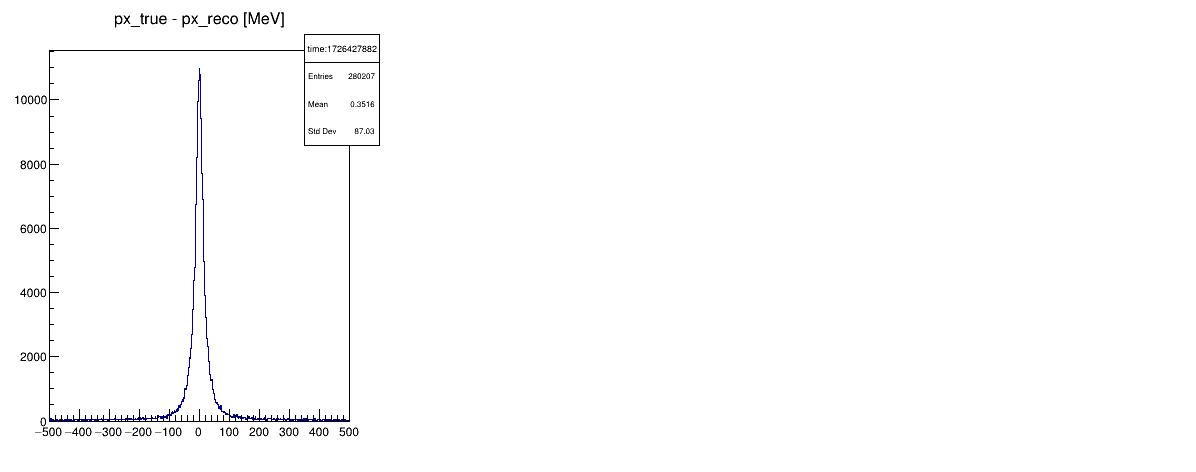

In [67]:
hist1 = tool.FillTH1D(iterable = df['p_truefX']-df['p_recofX'].dropna().values, 
                          histogram_name = "", 
                          title = "px_true - px_reco [MeV]", 
                          nbins = int(np.sqrt(len(df))),
                          #  nbins = 30,
                          x_min = -500, 
                          x_max = 500)
hist2 = tool.FillTH1D(iterable = df['p_truefX']-df['p_recofX'].dropna().values, 
                          histogram_name = "", 
                          title = "px_true - px_reco [MeV]", 
                          nbins = int(np.sqrt(len(df))),
                          #  nbins = 30,
                          x_min = -500, 
                          x_max = 500)
hist3 = tool.FillTH1D(iterable = df['p_truefX']-df['p_recofX'].dropna().values, 
                          histogram_name = "", 
                          title = "px_true - px_reco [MeV]", 
                          nbins = int(np.sqrt(len(df))),
                          #  nbins = 30,
                          x_min = -500, 
                          x_max = 500)

# hist_ptot, mean, sigma = tool.FitTH1D_w_gauss(hist = hist_ptot, 
#                                              gauss_range = (-0.2, 0.2), 
#                                              fit_range = (-0.1,0.1))

c = ROOT.TCanvas("canvas_name", "Canvas", 1200, 500)
c.Divide(3)

c.cd(1)
ROOT.gStyle.SetOptFit(1011)
hist1.Draw()
c.Draw()

c.cd(2)